In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
dt_info = pd.read_csv('data/data_info.csv')

In [3]:
dt_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [6]:
test.shape

(291241, 22)

In [4]:
train['maximum_speed_limit'].unique()

array([60., 80., 50., 70., 30., 40.])

In [5]:
train.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0


In [6]:
test.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음


c:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 

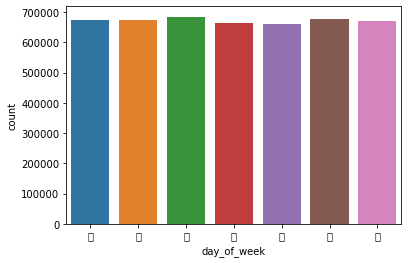

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['day_of_week'])
plt.show()

### 데이터 전처리

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

#### 날짜(`base_date`) 다루기

In [9]:
# 숫자형식이므로, 문자형으로 변경
train = train.astype({'base_date' : 'str'})
train['base_date']

0          20220623
1          20220728
2          20211010
3          20220311
4          20211005
             ...   
4701212    20211104
4701213    20220331
4701214    20220613
4701215    20211020
4701216    20211019
Name: base_date, Length: 4701217, dtype: object

In [10]:
# 날짜 형식으로 변환해주기
train['date'] = pd.to_datetime(train['base_date'])
train['date']

0         2022-06-23
1         2022-07-28
2         2021-10-10
3         2022-03-11
4         2021-10-05
             ...    
4701212   2021-11-04
4701213   2022-03-31
4701214   2022-06-13
4701215   2021-10-20
4701216   2021-10-19
Name: date, Length: 4701217, dtype: datetime64[ns]

In [11]:
# 년/월/일 쪼개주기
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,date,year,month,day
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,없음,제3교래교,33.427749,126.662335,없음,52.0,2022-06-23,2022,6,23
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022-07-28,2022,7,28
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,없음,상창육교,33.280072,126.362147,없음,61.0,2021-10-10,2021,10,10


In [12]:
train.drop(['base_date', 'date'], axis = 1, inplace = True)

In [13]:
## test 데이터셋도 변환
test = test.astype({'base_date' : 'str'})
test['date'] = pd.to_datetime(test['base_date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test.head(3)

test.drop(['base_date', 'date'], axis = 1, inplace = True)

#### 요일(`day_of_week`) OneHotEncoding 해주기

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder(sparse = False)

day_encoder = ohe.fit_transform(train[['day_of_week']])

In [16]:
ohe.categories_

[array(['금', '목', '수', '월', '일', '토', '화'], dtype=object)]

In [17]:
day_encoder = pd.DataFrame(day_encoder, columns = [col for col in ohe.categories_[0]])

In [18]:
day_encoder = day_encoder.astype(dtype = 'int64')

In [19]:
train.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,목,17,1,106,지방도1112호선,0,0,60.0,0.0,...,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23
1,TRAIN_0000001,목,21,2,103,일반국도11호선,0,0,60.0,0.0,...,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28
2,TRAIN_0000002,일,7,2,103,일반국도16호선,0,0,80.0,0.0,...,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10


In [20]:
train = train.drop(['day_of_week'], axis = 1)
train = pd.concat([train, day_encoder], axis = 1)
train.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TRAIN_0000000,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,...,2022,6,23,0,1,0,0,0,0,0
1,TRAIN_0000001,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,...,2022,7,28,0,1,0,0,0,0,0
2,TRAIN_0000002,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,...,2021,10,10,0,0,0,0,1,0,0


In [21]:
## test 데이터셋도 변환
day_encoder = ohe.fit_transform(test[['day_of_week']])
day_encoder = pd.DataFrame(day_encoder, columns = [col for col in ohe.categories_[0]])
day_encoder = day_encoder.astype(dtype = 'int64')
test = test.drop(['day_of_week'], axis = 1)
test = pd.concat([test, day_encoder], axis = 1)
test.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TEST_000000,17,3,107,연삼로,0,0,70.0,0.0,0.0,...,2022,8,25,0,1,0,0,0,0,0
1,TEST_000001,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,...,2022,8,9,0,0,0,0,0,0,1
2,TEST_000002,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,...,2022,8,5,1,0,0,0,0,0,0


#### 불필요 column 제거

도로명을 나타내는 `road_name`, `start_node_name`, `end_node_name` 제거

In [22]:
train.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)

In [23]:
test.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)

통과제한차량(`vehicle_restricted`) - 값이 하나뿐이므로 불필요하다 판단하여 제거함

In [24]:
train['vehicle_restricted'].unique()

array([0.])

In [25]:
train.drop('vehicle_restricted', axis = 1, inplace = True)
train.head(3)

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,road_type,start_latitude,...,year,month,day,금,목,수,월,일,토,화
0,17,1,106,0,0,60.0,32400.0,0.0,3,33.427747,...,2022,6,23,0,1,0,0,0,0,0
1,21,2,103,0,0,60.0,0.0,0.0,0,33.500730,...,2022,7,28,0,1,0,0,0,0,0
2,7,2,103,0,0,80.0,0.0,0.0,0,33.279145,...,2021,10,10,0,0,0,0,1,0,0


In [26]:
test['vehicle_restricted'].unique()

array([0.])

In [27]:
test.drop('vehicle_restricted', axis = 1, inplace = True)
test.head(3)

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,road_type,start_latitude,...,year,month,day,금,목,수,월,일,토,화
0,17,3,107,0,0,70.0,0.0,0.0,0,33.499427,...,2022,8,25,0,1,0,0,0,0,0
1,12,2,103,0,0,70.0,0.0,0.0,3,33.258507,...,2022,8,9,0,0,0,0,0,0,1
2,2,1,103,0,0,60.0,0.0,0.0,0,33.258960,...,2022,8,5,1,0,0,0,0,0,0


#### 문자열로 된 값 숫자(0과 1)로 변경

In [28]:
train.loc[train['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
train.loc[train['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1
train = train.astype({'start_turn_restricted' : 'int64'})
train['start_turn_restricted'].unique()

array([0, 1], dtype=int64)

In [29]:
train.loc[train['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
train.loc[train['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1
train = train.astype({'end_turn_restricted' : 'int64'})
train['end_turn_restricted'].unique()

array([0, 1], dtype=int64)

In [30]:
## test 데이터셋도 변경해주기
test.loc[test['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
test.loc[test['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1
test = test.astype({'start_turn_restricted' : 'int64'})
test['start_turn_restricted'].unique()

array([0, 1], dtype=int64)

In [39]:
## test 데이터셋도 변경해주기
test.loc[test['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
test.loc[test['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1
test = test.astype({'end_turn_restricted' : 'int64'})
test['end_turn_restricted'].unique()

array([1, 0], dtype=int64)

#### train/test set 분리

In [35]:
x_train = train.drop('target', axis = 1)
x_test = train['target']

### Modeling

#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
regr = RandomForestRegressor(max_depth = 5, n_estimators = 50, criterion = "mae")
regr.fit(x_train, x_test)

In [185]:
pre = regr.predict(test)

In [186]:
pre

array([27.40467691, 45.90115275, 45.90115275, ..., 27.40467691,
       27.40467691, 45.90115275])

In [187]:
sample_submission = pd.read_csv('data/sample_submission.csv')

In [188]:
sample_submission['target'] = pre
sample_submission.to_csv("submit.csv", index = False)

#### XGBoost

In [33]:
from xgboost import XGBRegressor

In [36]:
model = XGBRegressor()

model.fit(x_train, x_test)
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
pred = model.predict(test)
pred

array([25.524946, 45.490067, 64.05067 , ..., 20.649845, 24.051092,
       45.40076 ], dtype=float32)

In [43]:
model.score(x_train, x_test)

0.8859897627031256

In [44]:
model_2 = XGBRegressor(max_depth = 15, learning_rate = 0.1)
model_2.fit(x_train, x_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
pred_2 = model_2.predict(test)
pred_2

array([24.340588, 44.1629  , 65.41497 , ..., 22.22039 , 23.437443,
       47.975945], dtype=float32)

In [46]:
model_2.score(x_train, x_test)

0.9392003331549468

In [47]:
sample_submission = pd.read_csv('data/sample_submission.csv')

In [49]:
sample_submission['target'] = pred_2
sample_submission.to_csv("submit.csv", index = False)

#### Catboost

In [76]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 15.3/15.3 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [77]:
from catboost import CatBoostRegressor

In [146]:
catb = CatBoostRegressor(loss_function = 'MAE', n_estimators = 700, learning_rate = 0.03)
catb.fit(x_train, x_test)

0:	learn: 13.0207991	total: 324ms	remaining: 3m 46s
1:	learn: 12.8259484	total: 657ms	remaining: 3m 49s
2:	learn: 12.6403132	total: 961ms	remaining: 3m 43s
3:	learn: 12.4635637	total: 1.26s	remaining: 3m 39s
4:	learn: 12.2928149	total: 1.58s	remaining: 3m 39s
5:	learn: 12.1311493	total: 1.89s	remaining: 3m 38s
6:	learn: 11.9761867	total: 2.2s	remaining: 3m 37s
7:	learn: 11.8218724	total: 2.52s	remaining: 3m 38s
8:	learn: 11.6809067	total: 2.83s	remaining: 3m 37s
9:	learn: 11.5404984	total: 3.16s	remaining: 3m 37s
10:	learn: 11.4069151	total: 3.48s	remaining: 3m 38s
11:	learn: 11.2810681	total: 3.8s	remaining: 3m 37s
12:	learn: 11.1620050	total: 4.11s	remaining: 3m 37s
13:	learn: 11.0454617	total: 4.44s	remaining: 3m 37s
14:	learn: 10.9324199	total: 4.75s	remaining: 3m 37s
15:	learn: 10.8259757	total: 5.06s	remaining: 3m 36s
16:	learn: 10.7232023	total: 5.38s	remaining: 3m 35s
17:	learn: 10.6284598	total: 5.69s	remaining: 3m 35s
18:	learn: 10.5359369	total: 5.99s	remaining: 3m 34s
19:	l

In [147]:
catb.score(x_train, x_test)

0.6119145110535051

In [142]:
y_pred = catb.predict(test)
y_pred

array([25.50511577, 43.04149619, 50.14714644, ..., 21.98868043,
       27.12937654, 41.75008717])

In [148]:
model.score(x_train, x_test)

0.6367680511520952

In [73]:
sample_submission = pd.read_csv('data/sample_submission.csv')

In [131]:
sample_submission['target'] = y_pred
sample_submission.to_csv("submit_1.csv", index = False)